# **Employee satisfaction project: Providing data-driven suggestions for HR**

## Description and deliverables

# **PACE stages**


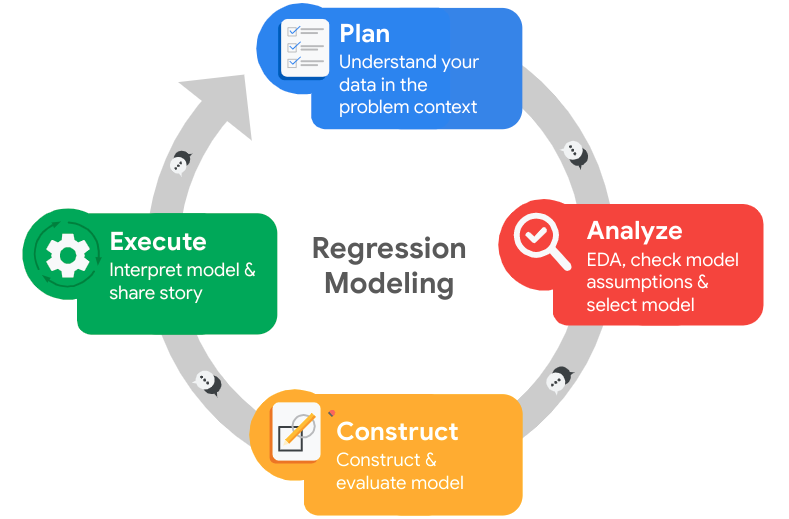

## Pace: Plan Stage

### The business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and now referring to me as the data analytics professional, HR is requesting some data-driven suggestions based on my understanding of the data. They have the following question: *what’s likely to make the employee leave the company?*

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset

The dataset in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** This data was recovered from the data science platform Kaggle.com, ref. [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [31]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [32]:
# Load dataset into a dataframe
df0 = pd.read_csv(r"C:\Users\spectre\Downloads\Capstone project\HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)

### Gather basic information about the data

In [33]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [34]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [35]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [36]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [37]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [38]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [39]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

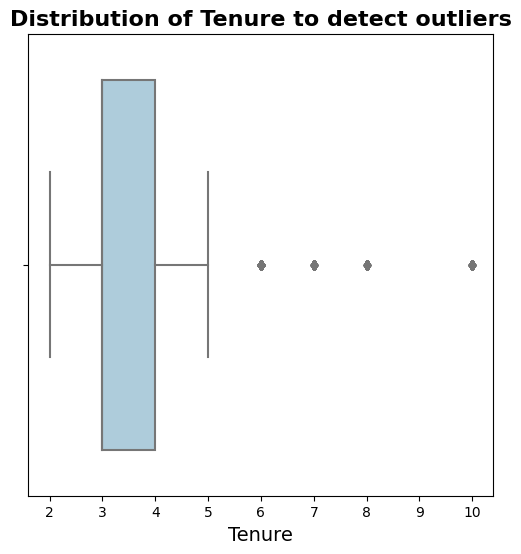

In [44]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers, palette paired
plt.figure(figsize=(6,6))
sns.boxplot(x=df1['tenure'], palette='Paired')
plt.title('Distribution of Tenure to detect outliers', fontsize=16, fontweight='bold')
plt.xlabel('Tenure', fontsize=14)
plt.show()

In [45]:
# Determine the number of rows containing outliers

# Compute the 25th percentile of `tenure`
q25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile of `tenure`
q75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range (IQR) of `tenure`
iqr = q75 - q25

# Define the upper and lower bounds for outliers
upper_bound = q75 + 1.5 * iqr
lower_bound = q25 - 1.5 * iqr
print('The upper bound for outliers is', upper_bound)
print('The lower bound for outliers is', lower_bound)

# Identify subset of rows containing outliers in `tenure`
outliers = df1[(df1['tenure'] < lower_bound) | (df1['tenure'] > upper_bound)]

# Count the number of rows containing outliers
print('The number of rows containing outliers is', outliers.shape[0])

The upper bound for outliers is 5.5
The lower bound for outliers is 1.5
The number of rows containing outliers is 824


`Note` : Certain types of models are more sensitive to outliers than others. When we get to the stage of building the model, we shall consider whether to remove outliers, based on the type of model we decided to use.

## Pace : Analyze Stage

## Step 2. Data Exploration (Continue EDA)

In [46]:
# Get numbers of people and percentages of left vs. stayed
print('The number of people who left :', df1['left'].sum()), 
print('Which represents the percentage of :', round(df1['left'].sum() / df1.shape[0] * 100, 2), '%' )
print('The number of people who stayed :', df1['left'].value_counts()[0]),
print('Which represents the percentage of :', round(df1['left'].value_counts()[0] / df1.shape[0] * 100, 2), '%' )

The number of people who left : 1991
Which represents the percentage of : 16.6 %
The number of people who stayed : 10000
Which represents the percentage of : 83.4 %


### Data visualizations

In this part of the project, we visualize relationships between variables in the data.
We start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

Box plots are useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, we are using a stacked histogram to visualize the distribution of `number_project` for those who stayed and those who left.

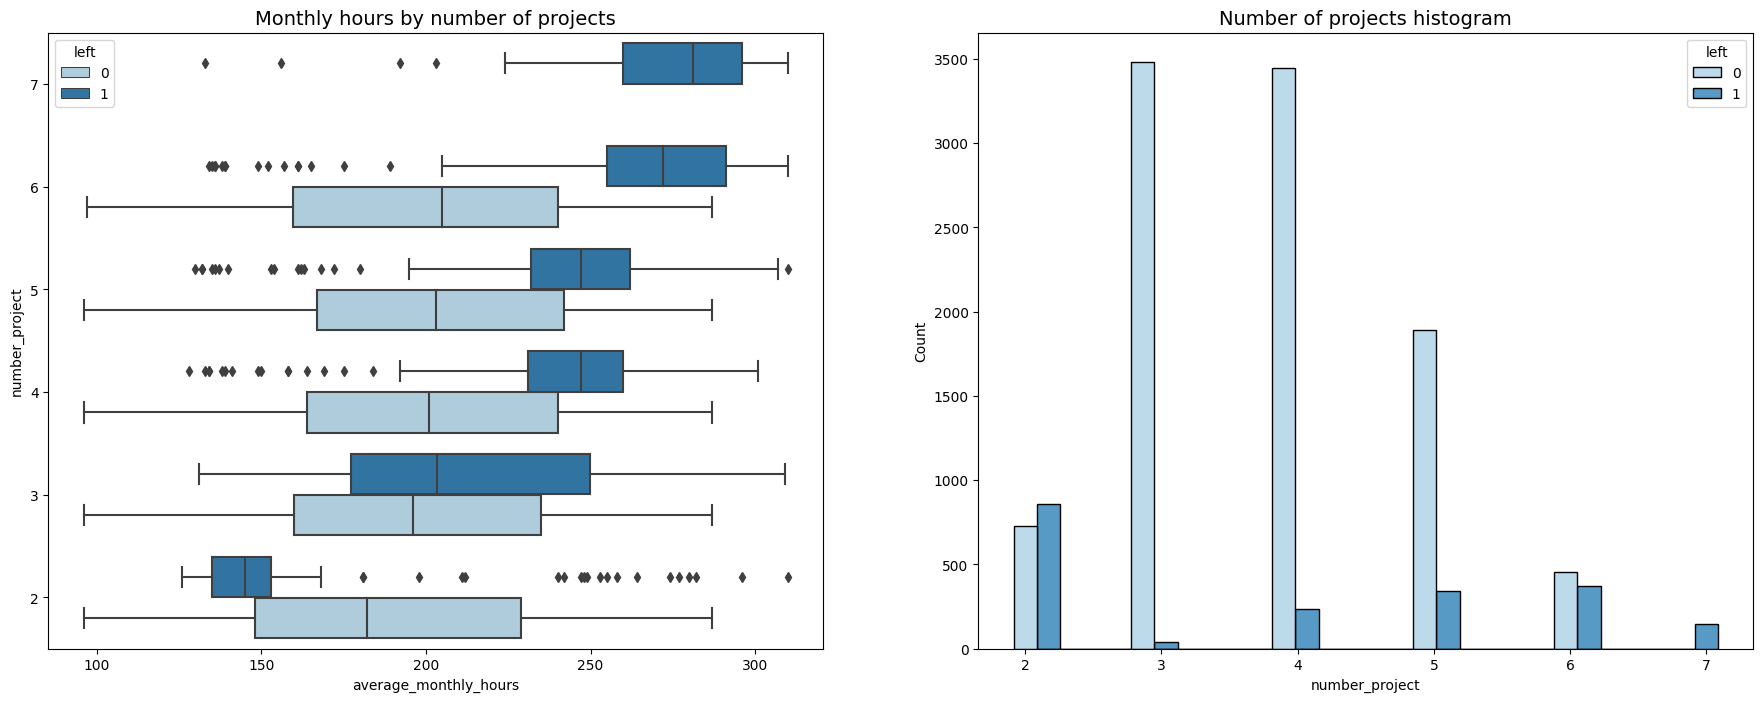

In [59]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left, paired palette 
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0], palette='Paired')
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1], palette='Paired')
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

Generally speaking, people working more projects would be expected to work more hours.
We notice that employees who left the company worked on more projects on average than those who stayed. This is an interesting finding, and we will explore it further in the next step.

1. There are two groups of employees who left the company: (A) Those who worked on a lot of projects and (B) those who worked on very few projects.
For group A, it is possible that they left because they were overworked or fired. For group B, it is possible that they left because they had too much free time or already in a transition to another job which would explain why they were working on so few projects with so few hours.

2. Every employee who worked on 7 projects or more left the company.  the interquartile ranges for this group and those who left with 6 projects was ~245&ndash;295 hours/week&mdash more than any other group.

3. The optimal number of projects for employees to work on seems to be 3&ndash;5. Employees who worked on 3&ndash;5 projects had the highest retention rate.

4. If we assume that a regular week is 40 hours, and that the average employee works 4 weeks per month, then the average employee works 160 hours per month. It would mean that employees who worked on 7 projects or more worked 1.5&ndash;2 times more than the average employee. This is a lot of work, and it is possible that these employees were overworked and left the company for that reason.

Confirm if all the employees who worked on 7 projects or more left :

In [50]:
# Compute counts of employees who left with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

In [51]:
# Compute counts of employees with 7 projects
df1[df1['number_project']==7].count()

satisfaction_level       145
last_evaluation          145
number_project           145
average_monthly_hours    145
tenure                   145
work_accident            145
left                     145
promotion_last_5years    145
department               145
salary                   145
dtype: int64

Next check is to examine the relationship between the average number of hours worked per month (`average_monthly_hours`) and the satisfaction level (`satisfaction_level`) for employees who left the company.

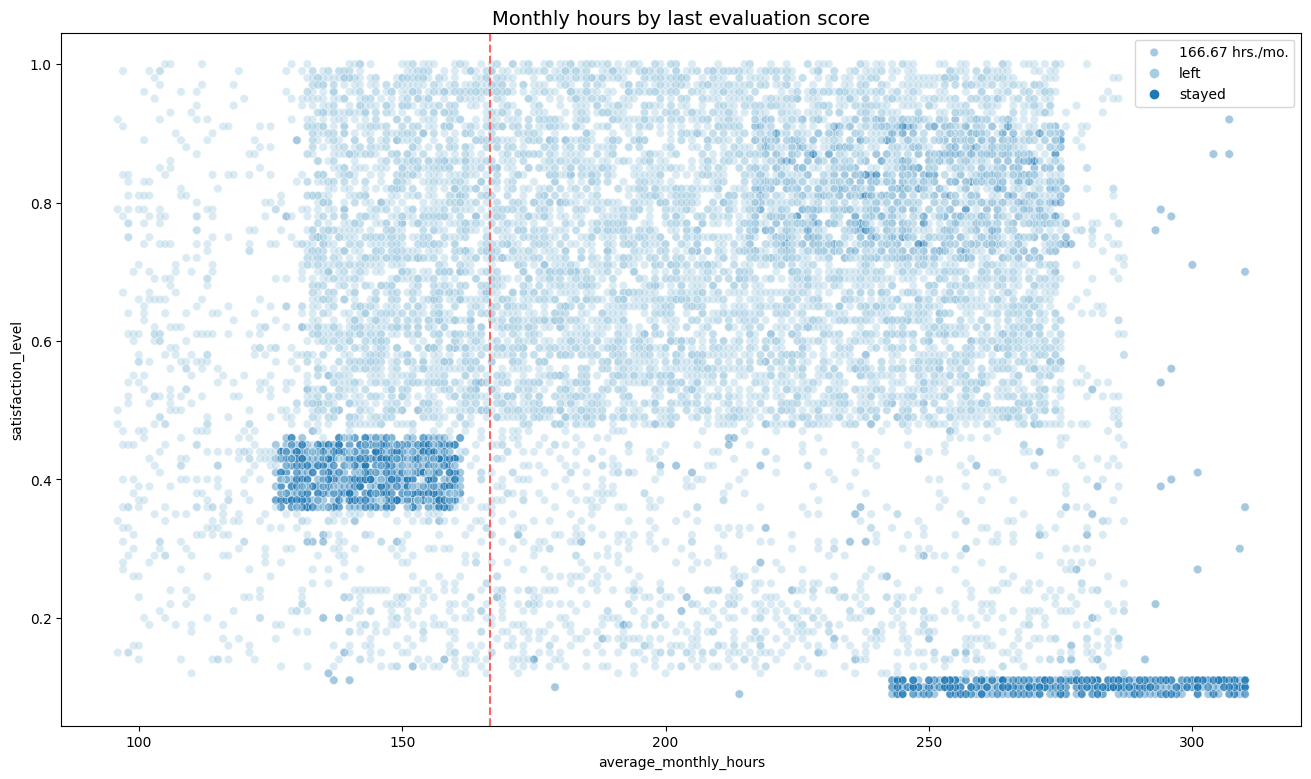

In [52]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4, palette='Paired')
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

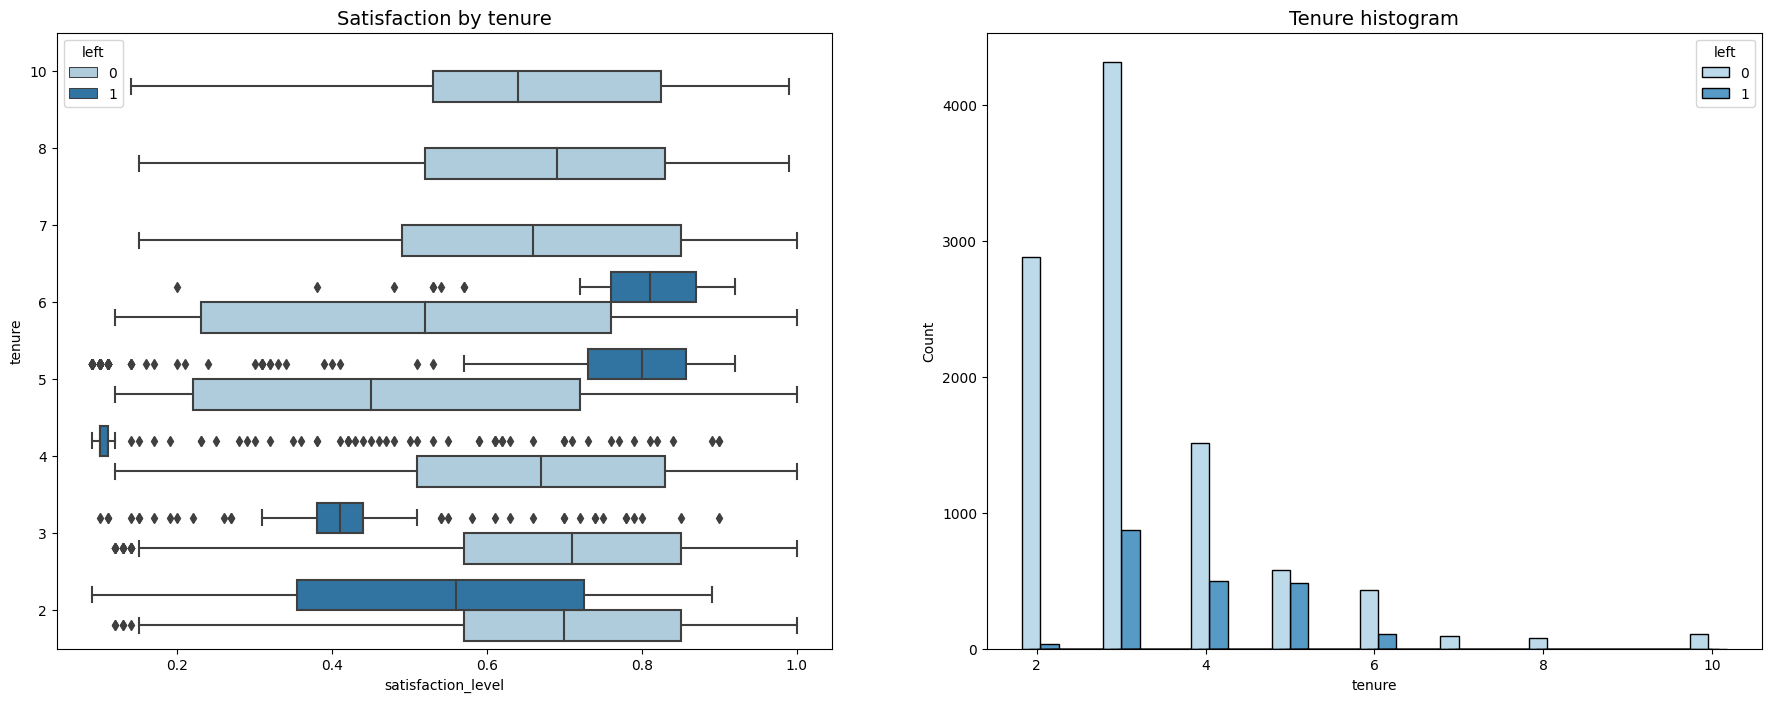

In [60]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0], palette='Paired')
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1], palette='Paired')
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations we could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave (7 years and more). Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, we will calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [57]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. On the other hand, among the employees who stayed, the mean satisfaction score appears to be slightly below the median score. This suggests that the distribution of satisfaction scores for employees who stayed is slightly skewed to the left.

Next, we examine the salary levels for different tenures.

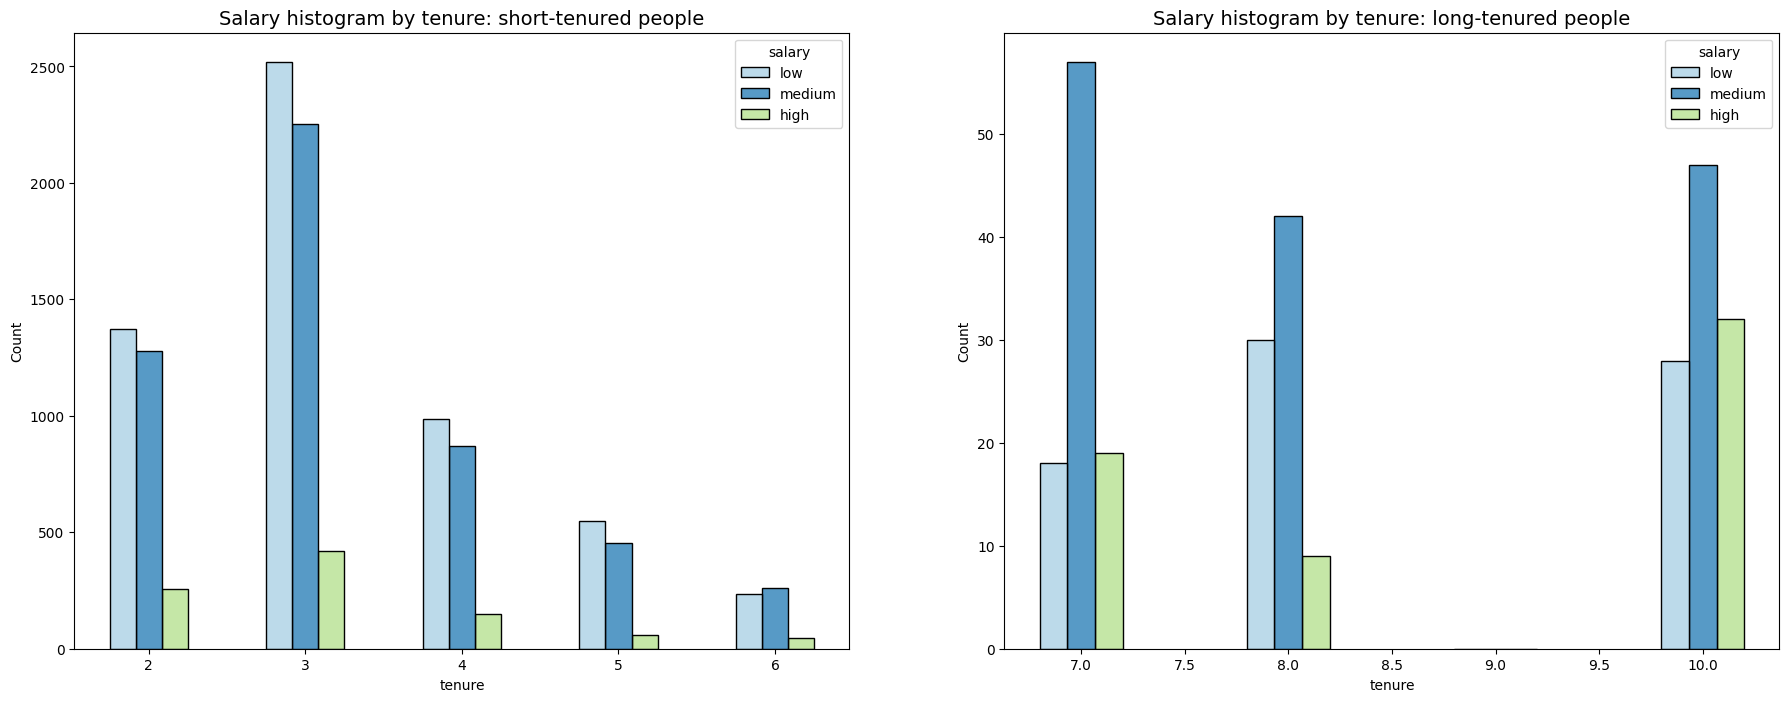

In [61]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0], palette='Paired')
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1], palette='Paired')
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plot above is showing that the long-tenured employees were not disproportionately high-paid.

Next, we explore wether there is a correlation between working long hours and receiving high evaluation scores.

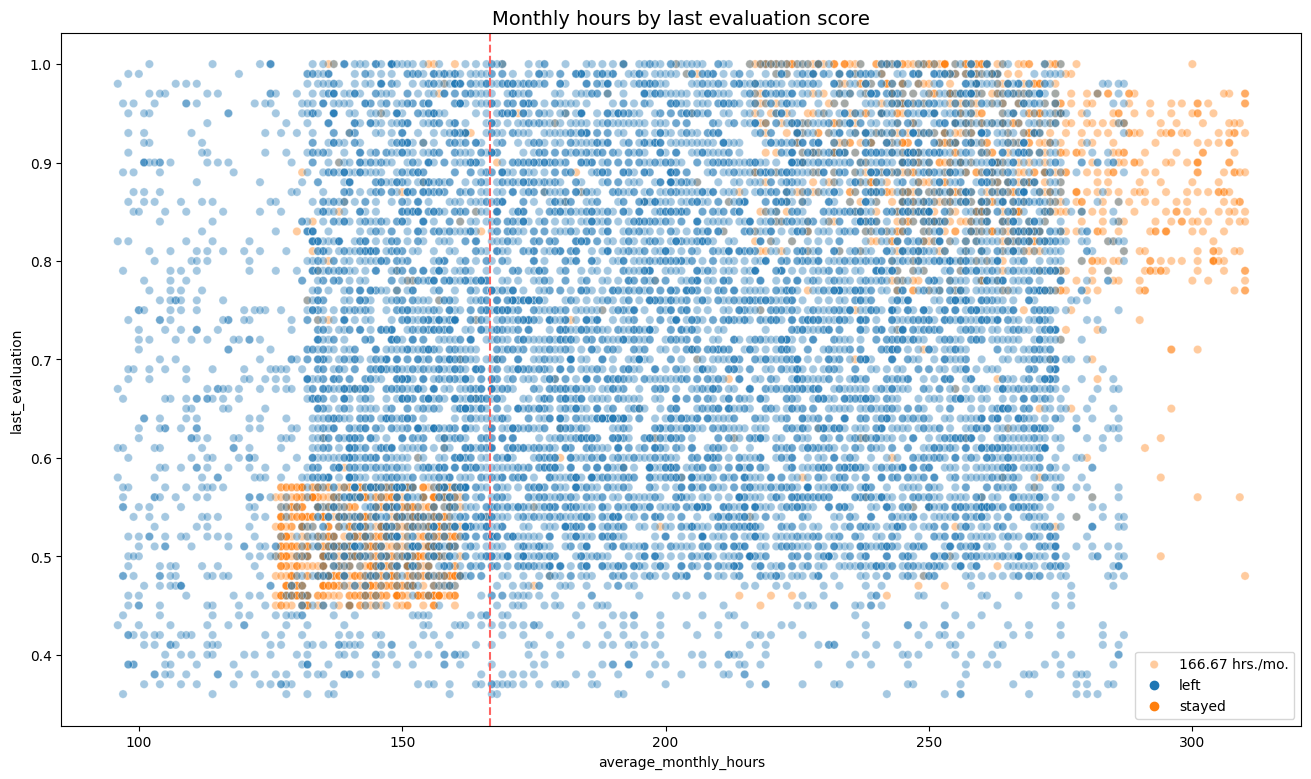

In [64]:
# Create a scatterplot of `average_monthly_hours` versus `last_evaluation`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, we examine whether employees who worked very long hours were promoted in the last five years.

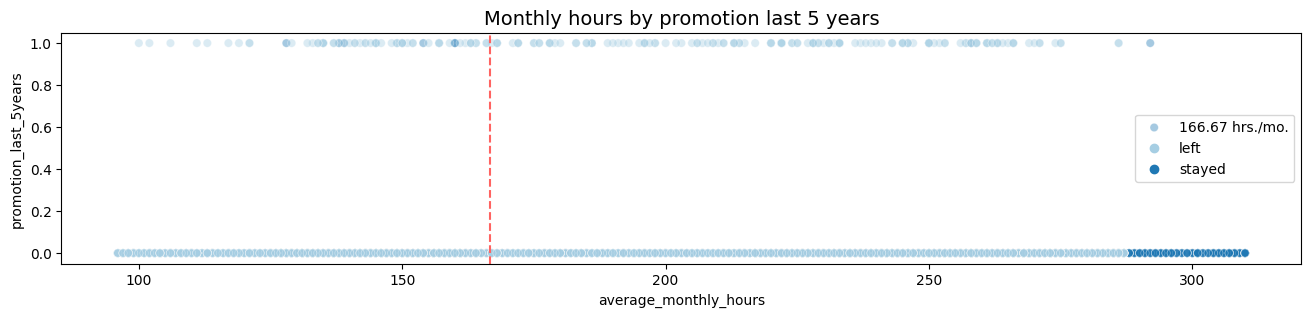

In [65]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4, palette='Paired')
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- Few employees who were promoted in the last five years left
- Few employees who worked the most hours were promoted
- All of the employees who left were working the longest hours  

Next, we inspect how the employees who left are distributed across departments.

In [66]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

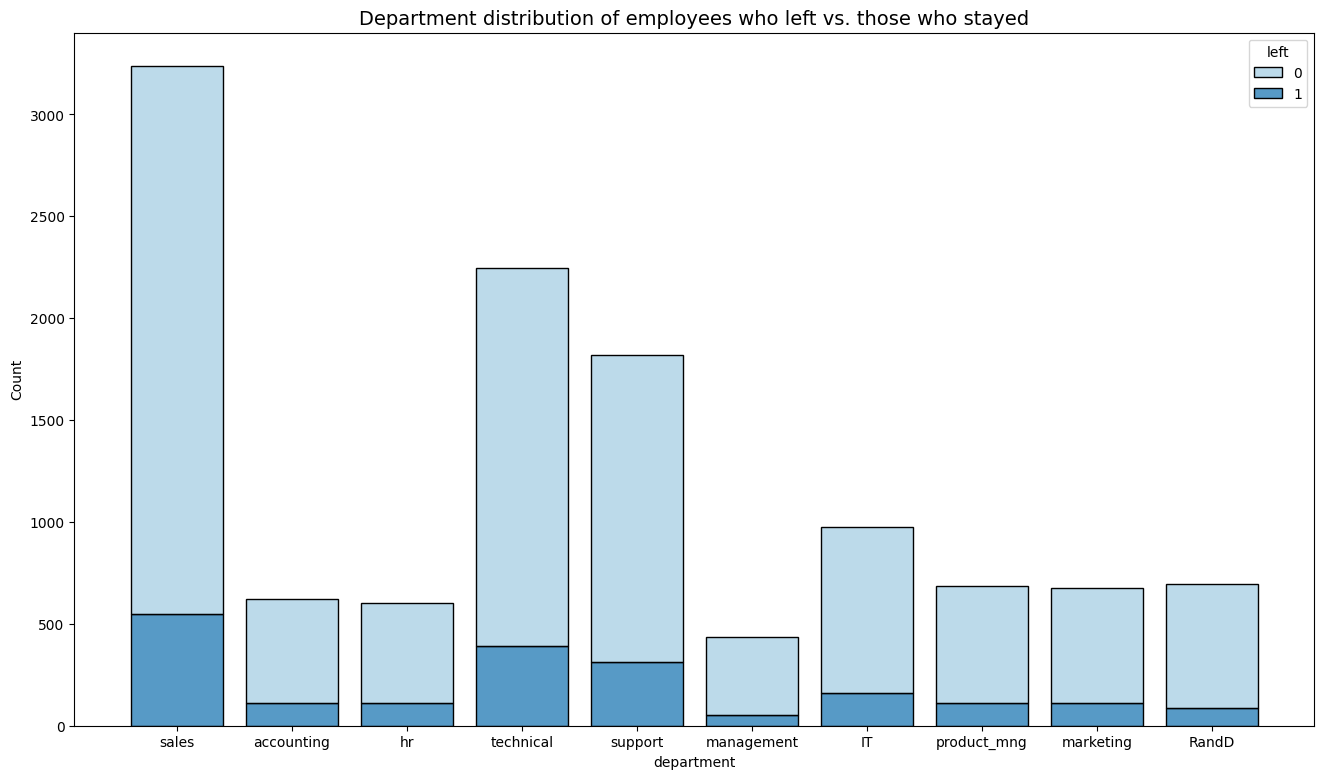

In [69]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(16, 9))
sns.histplot(data=df1, x='department', hue='left', multiple='stack', shrink=.8, palette='Paired')
plt.title('Department distribution of employees who left vs. those who stayed', fontsize='14');

Aside the Sales department, there doesn't seem to be any other department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, we check for strong correlations between variables in the data.

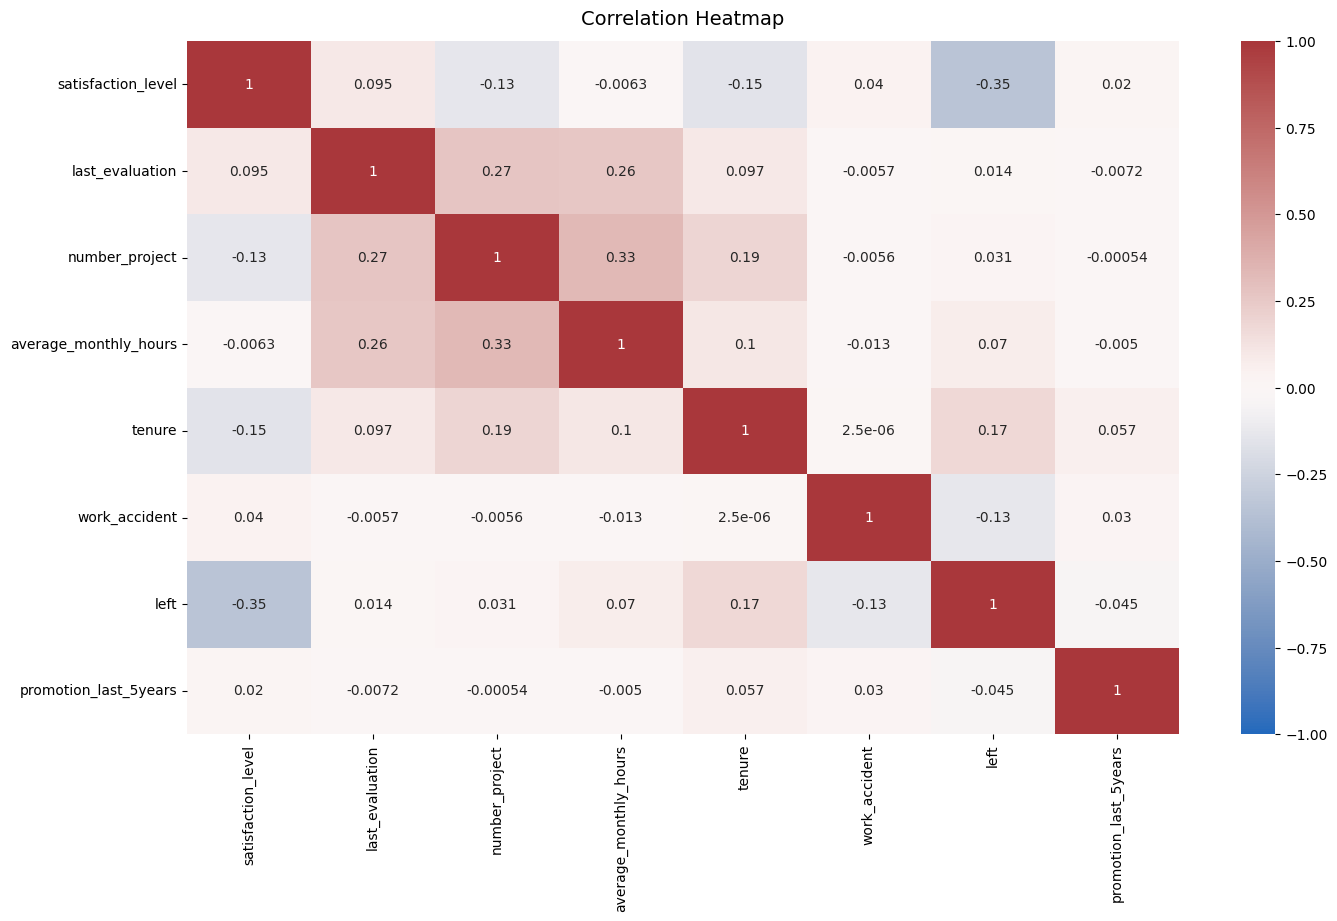

In [82]:
# Remove the department column from the dataframe
df2 = df1.drop(['department', 'salary'], axis=1)

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

## Insights ##
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

## Pace: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well the model fits the data


### Model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multi-collinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The objective is to predict wether an employee will leave the company or not. This is a binary classification task. As a reminder, the outcome variable `left` can be either 0 (employee stayed) or 1 (employee left).

### Identify the types of models most appropriate for this task.

We will use a `logistic regression model first`, then a `random forest model`.
By implementing both models, we can compare their performance and choose the best one.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

#### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data into training and test sets, we will create dummy variables for the categorical variables `department`, but since `salary` is an ordinal variable, we will convert it to a numeric variable with levels 0, 1, and 2.

In [83]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


We create a heatmap to visualize how correlated variables are. focusing on variables we're interested in examining correlations between.

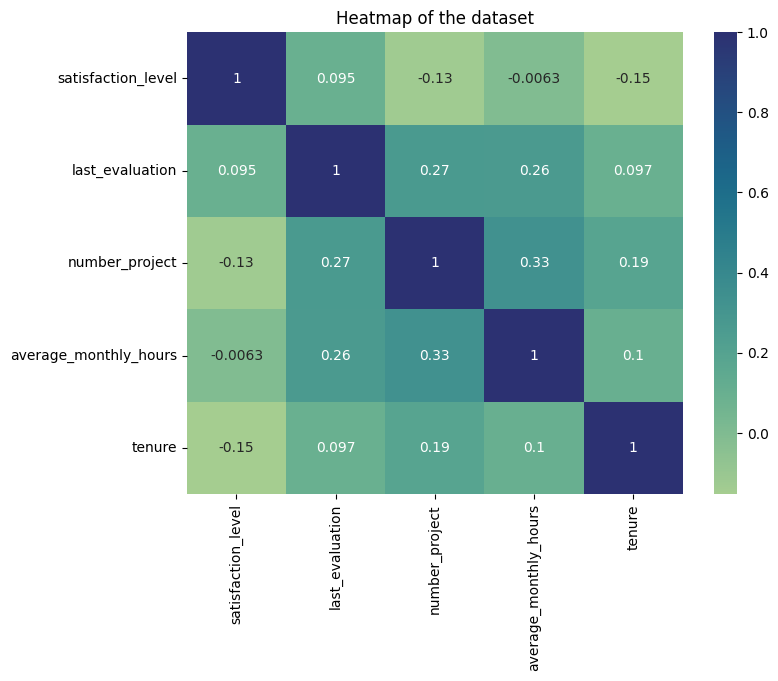

In [85]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation',
                    'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

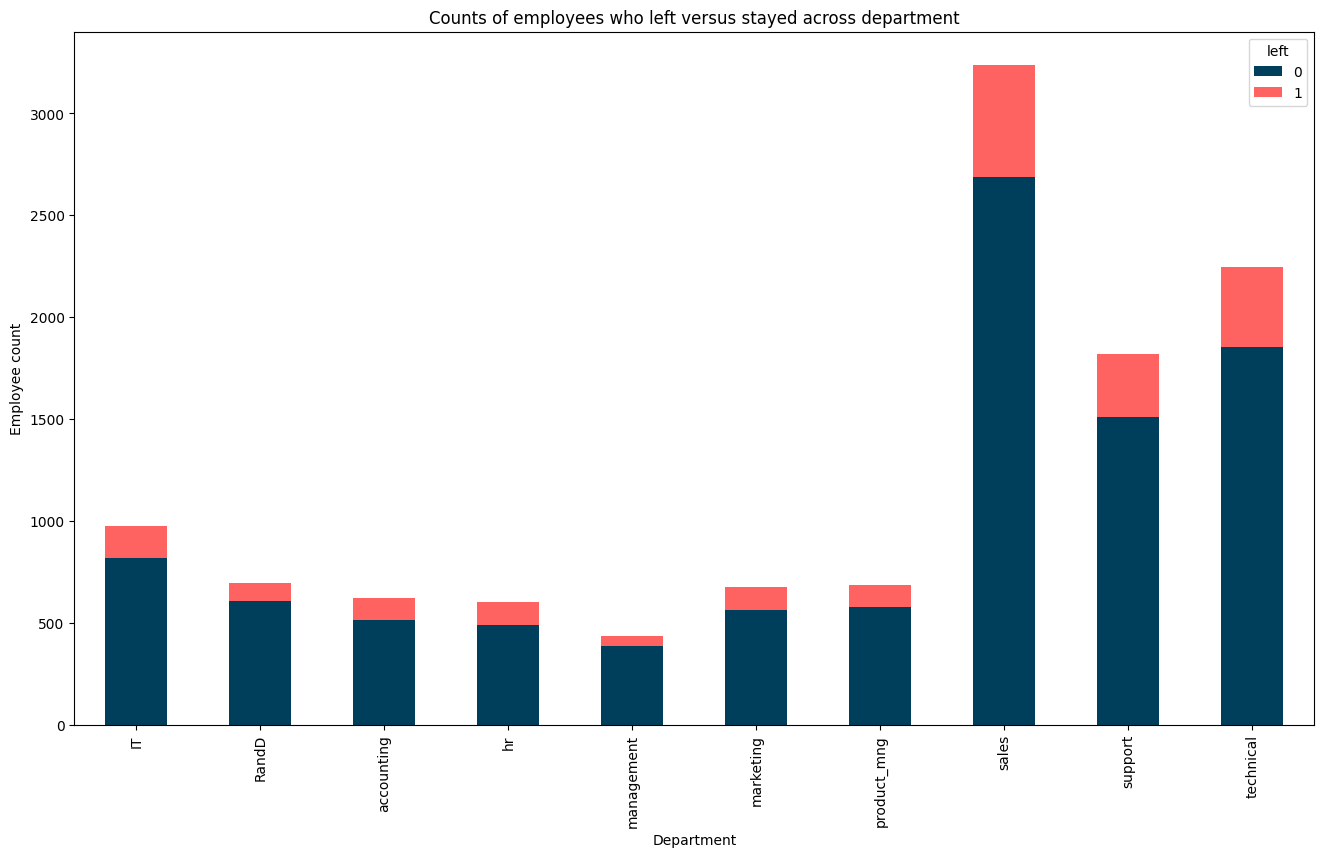

In [89]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# Add paired palette to the plot
# In the legend, 0 (Dark blue) represents employees who did not leave, 1 (Salmon) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar', stacked=True, figsize=(16, 9), color=['#003f5c', '#ff6361'])
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it is preferable at this stage to remove the outliers in the `tenure` column that were identified earlier.

In [91]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_bound) & (df_enc['tenure'] <= upper_bound)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Time to isolate the outcome variable, which is the variable we want to predict. In this case, it is the `left` column.

In [92]:
# Isolate the outcome variable
y = df_logreg['left']

# Display the first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

We have to select the features we want to use in our model to predict the outcome variable.

In [93]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


We split the data into training and testing sets, it is important to stratify since the classes are imbalanced.

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

We construct the logistic regression model then fit it to the training dataset.

In [96]:
# Construct a logistic regression model and fit it to the training data
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

Testing the logistic regression model, we will make predictions on the test dataset.

In [97]:
# Use the model to make predictions on the test data
y_pred = log_clf.predict(X_test)

Creating a confusion matrix to visualize the performance of the model.

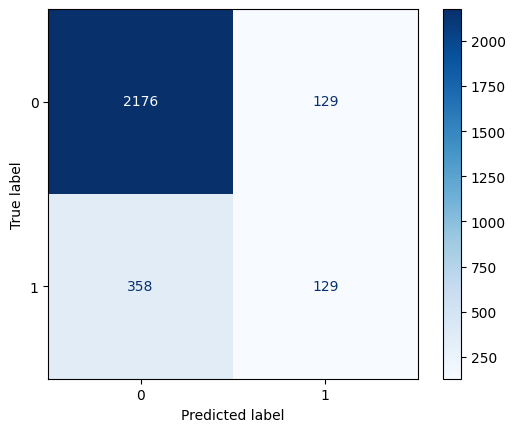

In [98]:
# Compute values for the confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display for the confusion matrix
log_disp = ConfusionMatrixDisplay(log_cm, display_labels=log_clf.classes_)

# Plot the confusion matrix
log_disp.plot(cmap='Blues', values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives, and the lower-right quadrant displays the number of true positives. The lower-left quadrant displays the number of false negatives, and the upper-right quadrant displays the number of false positives.

- True negatives: The number of employees who stayed and were predicted to stay is 2,176.
- True positives: The number of employees who left and were predicted to leave is 129.
- False negatives: The number of employees who left but were predicted to stay is 358.
- False positives: The number of employees who stayed but were predicted to leave is 129.

In summary, the confusion matrix above shows that the model correctly predicted that 2,176 employees would stay and 129 would leave. It incorrectly predicted that 129 employees would leave and 358 would stay. A perfect model would predict all true negatives and true positives and no false negatives or false positives.

Let's create a classification report to get a more detailed evaluation of the model.

We begin by checking the class balance in the data. In other words we check the value counts for the outcome variable `left`. Since this is a binary classification task, the class balance informs the way we interpret the model's performance.

In [99]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is an approximately 83%-17% split between the classes. This means that the data is not perfectly balanced, but it is not too imbalanced either.
<br> If it was severely imbalanced, we might need to resample the data to ensure that the model is trained on a balanced dataset.
For our case, we will proceed with the data as is.

In [100]:
# Create a classification report for our logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2305
    Predicted would leave       0.50      0.26      0.35       487

                 accuracy                           0.83      2792
                macro avg       0.68      0.60      0.62      2792
             weighted avg       0.80      0.83      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 83%, and F1 score of 80% (all weighted averages), and lastly an accuracy of 83%.
<bf> However, we are trying to predict if an employee, and the scores are significantly lower.

### Modeling Approach B: Tree-based model

This approach covers implementation of Decision tree and Random Forest.

Isolate the outcome variable

In [101]:
# Isolate the outcome variable
y = df_logreg['left']

# Display the first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Selecting the features.

In [102]:
# Select the features for the model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


Split the data into training, validation, and testing sets.

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 1

Constructing a decision tree model and set up cross-validated grid search to find the best model parameters.

In [105]:
# Instentiate a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to `params_dt`
params_dt = {'max_depth': [3, 4, 5, None],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'min_samples_split': [0.04, 0.06, 0.08]
            }

# Assign a dictionary of scoring metrics to `scoring`
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a 4 cv fold grid search 
tree1 = GridSearchCV(estimator=tree_clf,
                        param_grid=params_dt,
                        scoring=scoring,
                        refit='roc_auc',
                        cv=4,
                        n_jobs=-1)

Fit the decision tree model to the training dataset.

In [106]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 703 ms
Wall time: 19.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, None],
                         'min_samples_leaf': [0.04, 0.06, 0.08],
                         'min_samples_split': [0.04, 0.06, 0.08]},
             refit='roc_auc',
             scoring={'recall', 'f1', 'roc_auc', 'accuracy', 'precision'})

Identify the optimal values for the model parameters.

In [107]:
# Check the best parameters
tree1.best_params_

{'max_depth': None, 'min_samples_leaf': 0.04, 'min_samples_split': 0.04}

Identify the best AUC score achieved by the decision tree model on the training set

In [108]:
# Check the best AUC score on CV
tree1.best_score_

0.9656622177289983

0.96 is a very good AUC score. It means that the model can predict employees who will leave with 96% accuracy.

Next, we write a function to extract all the scores from the grid search.

In [109]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Use the function to extract the scores from the grid search.

In [110]:
# Extract all CV scores
tree1.cv_results = make_results('decision tree cv', tree1, 'auc')
tree1.cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.798632,0.924173,0.856797,0.947941,0.965662


All of these scores from the decision tree model are very good. The model is performing well on the training set. but decision trees can be vulnerable to overfitting, so we will proceed to random forests to avoid it by incorporating multiple trees to make predictions.

#### Random forest - Round 1

Constructing a random forest model and set up cross-validated grid search to find the best model parameters.

In [112]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to `params_rf`
params_rf = {'max_depth': [3, 5, None],
            'n_estimators': [300, 500],
            'max_features': [1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            }

# Assign a dictionary of scoring metrics to `capture`
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a grid search
rf1 = GridSearchCV(estimator=rf,
                    param_grid=params_rf,
                    scoring=scoring,
                    refit='roc_auc',
                    cv=4,
                    n_jobs=-1)

fit the random forest model to the training dataset.

In [113]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 2.19 s
Wall time: 4min 8s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'f1', 'roc_auc', 'accuracy', 'precision'})

Specify path to where the model will be saved.

In [114]:
# Define a path to save the model
model_path = r"C:\Users\spectre\Downloads\Capstone project\rf1.pkl"

Define functions to pickle and unpickle the model.

In [115]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [116]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the function defined above to save the model in a pickle file.

In [117]:
# Write pickle
write_pickle(model_path, rf1, 'hr_rf1')

In [119]:
# Read pickle
rf1 = read_pickle(model_path, 'hr_rf1')

Identify the optimal AUC score achieved by the random forest model on the training set.

In [120]:
# Check best AUC score on CV
rf1.best_score_

0.9802415320040019

Identify the best values for the model parameters.

In [121]:
# check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [122]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Next, use the best performing model to make predictions on the test set.

In [123]:
# Get predictions on test data
rf1.test_results = get_scores('random forest test', rf1, X_test, y_test)
rf1.test_results

,model,precision,recall,f1,accuracy,AUC
0,random forest test,0.98427,0.929936,0.956332,0.985673,0.96346


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

#### Feature Engineering

Reading the high evaluation scores, there is a chance that there is some data leakage occurring.
<br> Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

We will proceed by dropping ´satisfaction_level´ and creating a new feature called ´overworked´, that will be a binary variable.

In [124]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df3 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df3.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [126]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df3['overworked'] = df3['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df3['overworked'].max())
print('Min hours:', df3['overworked'].min())

Max hours: 310
Min hours: 96


166.67 hours per month is the average number of monthly hours for an employee who works 50 weeks per year, 5 days per week, and 8 hours per day.

We will define being overworked as working more than 175 hours per month on average.

We will make the overworked column binary by reassigning its values using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [128]:
# Define `overworked` as working > 175 hrs/week
df3['overworked'] = (df3['overworked'] > 175).astype(int)

# Display first few rows of new column
df3['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

Drop the average monthly hours column.

In [129]:
# Drop `average_monthly_hours` column
df3 = df3.drop('average_monthly_hours', axis=1)

# Display first few rows of new dataframe
df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


Again, isolate the features and outcome variable.

In [130]:
# Isolate the outcome variable
y = df3['left']

# Select the features for the model
X = df3.drop('left', axis=1)

Split the data into training and testing sets.

In [131]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2

In [133]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to `params_dt`
params_dt = {'max_depth': [3, 4, 5, None],
            'min_samples_leaf': [0.04, 0.06, 0.08],
            'min_samples_split': [0.04, 0.06, 0.08]
            }

# Assign a dictionary of scoring metrics to `scoring`
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a grid search
tree2 = GridSearchCV(estimator=tree,
                    param_grid=params_dt,
                    scoring=scoring,
                    refit='roc_auc',
                    cv=4,
                    n_jobs=-1)

In [134]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 328 ms
Wall time: 5.62 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, None],
                         'min_samples_leaf': [0.04, 0.06, 0.08],
                         'min_samples_split': [0.04, 0.06, 0.08]},
             refit='roc_auc',
             scoring={'recall', 'f1', 'roc_auc', 'accuracy', 'precision'})

In [135]:
# Check best AUC score on CV
tree2.best_score_

0.9394927188618561

We notice that this model is performing well even without satisfaction levels and average monthly hours.

Next, we check the other scores.

In [136]:
# Get all CV scores
tree2.cv_results = make_results('decision tree cv', tree2, 'auc')
print(tree1.cv_results)
print(tree2.cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.798632  0.924173  0.856797  0.947941  0.965662
              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.668157  0.897507  0.763772  0.907373  0.939493


Some of the scores are slightly lower than the first round of decision tree models, which is to be expected given fewer features taken into account for the second model. However, the scores are still very good.

#### Random forest - Round 2

In [137]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to `params_rf`
params_rf = {'max_depth': [3, 5, None],
            'n_estimators': [300, 500],
            'max_features': [1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            }

# Assign a dictionary of scoring metrics to `scoring`
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate a grid search
rf2 = GridSearchCV(estimator=rf,
                    param_grid=params_rf,
                    scoring=scoring,
                    refit='roc_auc',
                    cv=4,
                    n_jobs=-1)

In [138]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 3.06 s
Wall time: 4min 47s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'f1', 'roc_auc', 'accuracy', 'precision'})

In [139]:
# Write pickle
write_pickle(model_path, rf2, 'hr_rf2')

In [140]:
# Read pickle
rf2 = read_pickle(model_path, 'hr_rf2')

In [141]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [142]:
# check best AUC score on CV
rf2.best_score_

0.964780010800323

In [143]:
# Get all CV scores
rf2.cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2.cv_results)
print(rf2.cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.668157  0.897507  0.763772  0.907373  0.939493
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866431  0.880763  0.873246  0.957634  0.96478


Again, the scores dropped slightly, but the random forest model performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set next.

In [144]:
# Get predictions on test data
rf2.test_results = get_scores('random forest2 test', rf2, X_test, y_test)
rf2.test_results

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.871154,0.909639,0.88998,0.962642,0.941419


This seems to be a stable, well-performing final model.

Next, we plot a confusion matrix to visualize the predictive performance of the model on the test set.

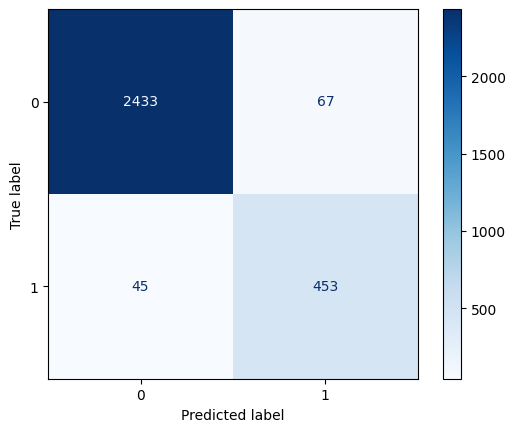

In [145]:
# Generate array values for confusion matrix
y_pred = rf2.best_estimator_.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred, labels=rf2.classes_)

# Create display for the confusion matrix
rf_disp = ConfusionMatrixDisplay(rf_cm, display_labels=rf2.classes_)
rf_disp.plot(cmap='Blues', values_format='')
plt.show()

the model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purposes, we will inspect the splits of the decision tree model and the most important features of the random forest model.

### Decision tree splits

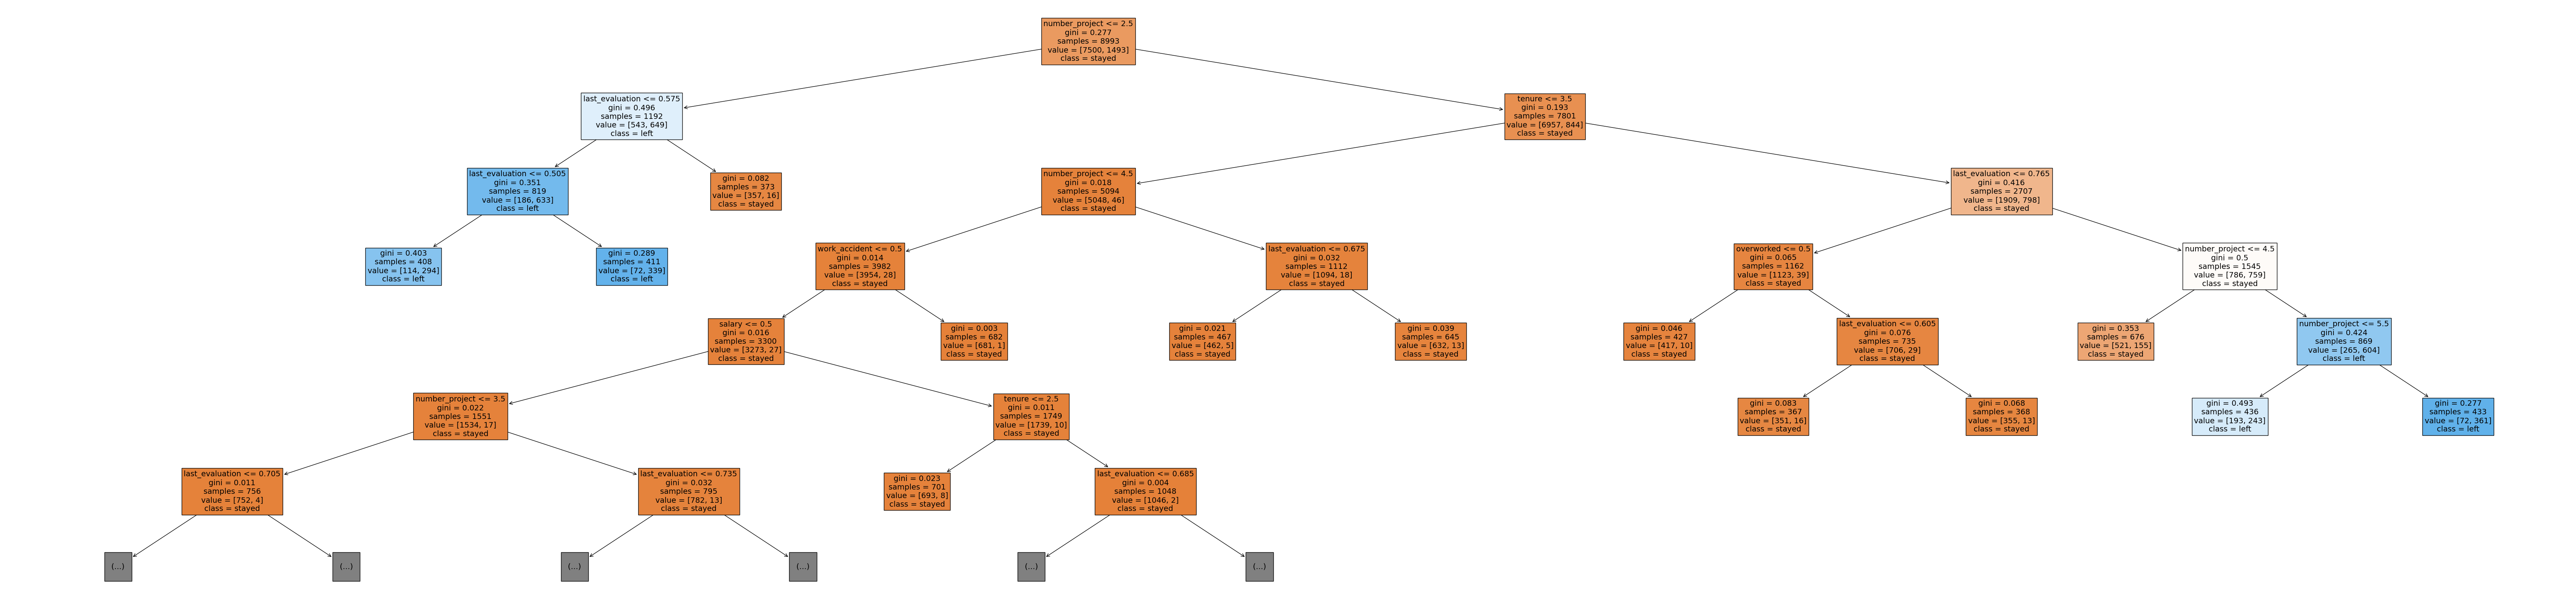

In [146]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [147]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.412092
last_evaluation,0.386736
tenure,0.201009
overworked,0.000097
work_accident,0.000035
salary,0.000031


Create a barplot to visualize the decision tree features importance.

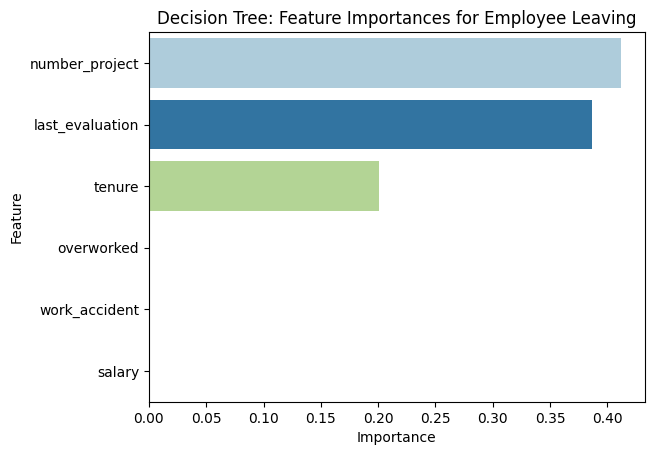

In [149]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h', palette='Paired')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot shows that in this decision tree model, the most important features are `number of projects`, `last_evaluation`, and `tenure`, in that order. These variables are most helpful in predicting whether an employee will leave or not.

#### Random forest feature importance

Now, plot the feature importance for the random forest model.

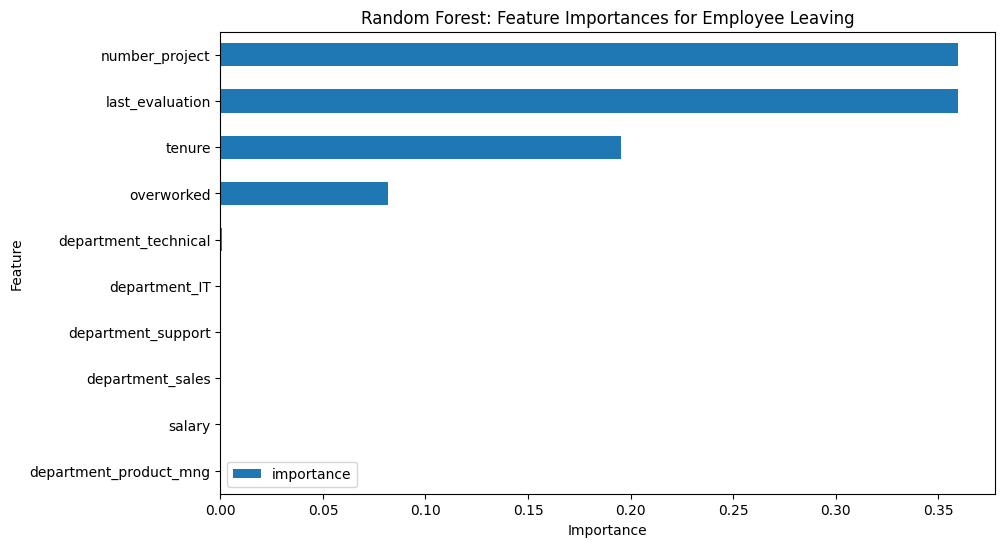

In [151]:
# Get feature importance
rf2_importances = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
rf2_indices = np.argsort(rf2_importances)[-10:]

# Get column labels of top 10 features
rf2_feat = X.columns[rf2_indices]

# Filter 'rf2_feat' to consist of only the top 10 features
rf2_importances = rf2_importances[rf2_indices]

y_df = pd.DataFrame({'feature': rf2_feat, 'importance': rf2_importances})
y_sort_df = y_df.sort_values('importance', ascending=True)
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', x='feature', y='importance', ax=ax1, color='C0')

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_xlabel("Importance")
ax1.set_ylabel("Feature")

plt.show()

The plot shown above shows that in this random forest model, `number of projects` , `last_evaluation`, `tenure`, and `overworked` have the highest feature importance, in that order. These variables are most helpful in predicting the outcome variable `left`, and they are the same as the ones used in the decision tree model.

# Pace: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Reflections for the executing stage.

- What key insights emerged from the model(s)?
- What business recommendations to propose based on the models built?
- What potential recommendations to make for the leadership?
- Could the model be improved? Why or why not? How?
- Given the known data and the models used, what other questions could be addressed for the team?
- Does any ethical considerations come up in this stage?

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted confirm that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

To retain employees, the company should consider the following:
- Limiting the number of projects employees work on to 3&ndash;5
- Limiting the number of hours employees work to a cap of 175 hours per month
- Ensuring that employees are promoted every 3&ndash;5 years
- Ensuring that employees receive good evaluation scores without having to work 200+ hours per month
- Ensuring that employees are rewarded for working long hours
- Promote company-wide and within-team discussions to understand and address employee concerns

**Next Steps**
It's understandable to be concerned about the data leakage raised earlier. It could be a good idea to think about how predictions change when 'last_evaluation' is removed from the data. It's possible that evaluations aren't performed very frequently, in which case being able to predict employee retention without this feature would be valuable. Additionally, it's likely that an employee's evaluation score impacts whether or not they stay on the job. In this instance, it could be a good idea to remove 'last_evaluation' from the data and see how the model performs.

**Ethical Considerations**
1. This model could be used to identify employees who are likely to leave the company, and then the company could take steps to retain them. However, it could also be used to identify employees who are likely to leave the company, and then the company could fire them before they quit. This is a potential ethical concern.

2. It's important to note that the data used in this project is synthetic, meaning that it was generated by a computer program. It's possible that the data was generated to be similar to real data, but it's also possible that the data was generated to be different from real data. If it is the last case, then the model's performance on real data could be different from its performance on the synthetic data. Which could be a potential ethical consideration if the model is used to make decisions about real employees.